In [1]:
#---------------------------------------------------------
# View the 2D/3D parameter grid for the BOSZ models
#---------------------------------------------------------
import numpy as np
import scipy as sp
import os
import collections

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d

from scipy import stats
%matplotlib inline

In [2]:
#----------------------------------
# read all the parameter data
#----------------------------------
DATAPATH = '/home/idies/workspace/pfs/'
para = np.genfromtxt(DATAPATH+'para.csv', delimiter=',',skip_header=1)

MH    = para[:,5]
Teff  = para[:,6]
logG  = para[:,7]
CM    = para[:,8]
ALPHA = para[:,9]

uM = np.unique(MH)
uT = np.unique(Teff)
uG = np.unique(logG)
uC = np.unique(CM)
uA = np.unique(ALPHA)


In [3]:
def gridPts(ax,i,j):
    ix = (ALPHA == uA[i]) & (CM==uC[j]) & (Teff<=10000)
    ax.plot(Teff[ix]/1000,logG[ix],MH[ix],'.',markersize=2)
    
def plotGrid(i,j):
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')    
    gridPts(ax,i,j)
    ax.set_xlabel('Teff')
    ax.set_ylabel('logG')
    ax.set_zlabel('MH')
    ax.view_init(70,65)
    plt.title(str(i)+':'+str(j))
    plt.draw()

def cuboid(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]     
    X += np.array(o)
    return X

def plotCube(lower,upper,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    sizes= []
    for l,u in zip(lower,upper):
        sizes.append((u[0]-l[0],u[1]-l[1], u[2]-l[2]))
    g = []
    for p,s,c in zip(lower,sizes,colors):
        g.append( cuboid(p,s))
    return mp3d.art3d.Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)


# 

In [4]:
#--------------------------------------------
# create the block definitions for a 
# reasonable partitining with some overlap
#--------------------------------------------
Blocks = collections.namedtuple('Blocks',['let','name','lower','upper','color'])

def setBlocks():
    #-------------------------------------------------------------------------------
    # M. M31 Giants     :  Teff [3500, 5000]  Logg [0.00, 2.00]  M/H [-2.5, 0.0]
    # W. MW Warm MS     :  Teff [5500, 7500]  Logg [3.25, 5.00]  M/H [-2.0, 0.0]  
    # C. MW Cool MS     :  Teff [3750, 5750]  Logg [3.50, 5.00]  M/H [-2.0, 0.0]
    # B. Blue HB        :  Teff [6750, 9500]  Logg [2.00, 3.25]  M/H [-2.5,-1.5]
    # R. Red HB         :  Teff [5000, 6750]  Logg [2.00, 3.25]  M/H [-1.0, 0.0]
    # G. Dwarf G Giants :  Teff [4000, 5500]  Logg [1.00, 3.50]  M/H [-2.5,-1.0]
    #-------------------------------------------------------------------------------
    let   = ['M','W','C','B','R','G']
    name  = ['M31 Giants','MW Warm MS','MW Cool MS','Blue HB','Red HB', 'Dwarf G Giants']
    color = ['orange','lightgreen','brown','dodgerblue','red','fuchsia']
    lower = [(3.5,0.0,-2.5),(5.5,3.5,-2.0),(3.75,3.5,-2.0),(6.75,2.0,-2.5),(5.00,2.0,-1.0),(4.0,1.0,-2.5)]
    upper = [(5.0,2.0, 0.0),(7.5,5.0, 0.0),(5.75,5.0, 0.0),(9.50,3.5,-1.5),(6.75,3.5, 0.0),(5.5,3.5,-1.0)]
    # old ranges
    #lower = [(3.5,0.0,-2.5),(5.5,3.5,-2.0),(4.5,4.0,-2.0),(7.0,2.0,-2.5),(5.0,2.0,-1.0),(3.5,0.0,-2.5)]
    #upper = [(5.0,2.0, 0.0),(7.5,5.0, 0.0),(6.0,5.0, 0.0),(9.5,3.0,-1.5),(6.5,3.0, 0.0),(5.5,3.5,-1.0)]
    
    return Blocks(let,name,lower,upper,color)

blk = setBlocks()

print(blk.let)
print(blk.name)
print(blk.lower)
print(blk.upper)
print(blk.color)


['M', 'W', 'C', 'B', 'R', 'G']
['M31 Giants', 'MW Warm MS', 'MW Cool MS', 'Blue HB', 'Red HB', 'Dwarf G Giants']
[(3.5, 0.0, -2.5), (5.5, 3.5, -2.0), (3.75, 3.5, -2.0), (6.75, 2.0, -2.5), (5.0, 2.0, -1.0), (4.0, 1.0, -2.5)]
[(5.0, 2.0, 0.0), (7.5, 5.0, 0.0), (5.75, 5.0, 0.0), (9.5, 3.5, -1.5), (6.75, 3.5, 0.0), (5.5, 3.5, -1.0)]
['orange', 'lightgreen', 'brown', 'dodgerblue', 'red', 'fuchsia']


In [5]:
def showBlocks3D(blk, theta, phi, label=''):
    #---------------------------------------------------------
    # take the block definitions and the viewing angle
        
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')

    pc = plotCube(blk.lower,blk.upper,colors=blk.color,edgecolor="k", lw=0.5, alpha=0.3)
    ax.add_collection3d(pc)    

    ax.set_xlim([10,3])
    ax.set_ylim([5,0])
    ax.set_zlim([-3,0.5])

    ax.set_xlabel('Teff/1000')
    ax.set_ylabel('logG')
    ax.set_zlabel('M/H')
    
    for i in range(len(blk.let)):
        p = blk.lower[i];
        ax.plot(*p,'s',color=blk.color[i],markersize=4)
    
    gridPts(ax,1,1)
        
    ax.legend(blk.name,markerscale=2)
    
    ax.view_init(theta,phi)

    if (label!=''):
        plt.savefig('F-blocks-'+label+'.png');
    
    plt.show()
    
def showBlocks2D12(blk,flag=0):
    #--------------------------------------------
    # plot the 2D parameter grid and the blocks
    # in Teff and log g
    #--------------------------------------------
    ix = (MH ==-2) & (CM==0) & (ALPHA==0)
    fig = plt.figure(figsize=(16,10))
    ax  = fig.add_subplot(111)
    
    
    ax.set_xlim((12500,3000))
    ax.set_ylim((6,-1))
    ax.set_xlabel('Teff')
    ax.set_ylabel('log g')
    
    for i in range(len(blk.let)):
        lo = blk.lower[i];
        hi = blk.upper[i];
        ax.add_patch(Rectangle((1000*lo[0],lo[1]),(hi[0]-lo[0])*1000,\
            hi[1]-lo[1], facecolor=blk.color[i],alpha=0.45,edgecolor=blk.color[i],lw=2))
    
    ax.legend(blk.name,markerscale=2)
    ax.plot(Teff[ix],logG[ix],'.') 
        
    if (flag>0):
        plt.savefig('F-grid-Teff-logG.png');
    plt.show()

def showBlocks2D23(blk,flag=0):
    #--------------------------------------------
    # plot the 2D parameter grid and the blocks
    # in Teff and log g
    #--------------------------------------------
    ix = (Teff == 6000) & (CM==0) & (ALPHA==0)
    fig = plt.figure(figsize=(16,10))
    ax  = fig.add_subplot(111)
    
    
    ax.set_xlim((-3,1))
    ax.set_ylim((6,-1))
    ax.set_xlabel('M/H')
    ax.set_ylabel('log g')
    
    for i in range(len(blk.let)):
        lo = blk.lower[i];
        hi = blk.upper[i];
        ax.add_patch(Rectangle((lo[2],lo[1]),(hi[2]-lo[2]),\
            hi[1]-lo[1], facecolor=blk.color[i],alpha=0.45,edgecolor=blk.color[i],lw=2))
    
    ax.legend(blk.name,markerscale=2)
    ax.plot(MH[ix],logG[ix],'.') 
        
    if (flag>0):
        plt.savefig('F-grid-MH-logG.png');
    plt.show()

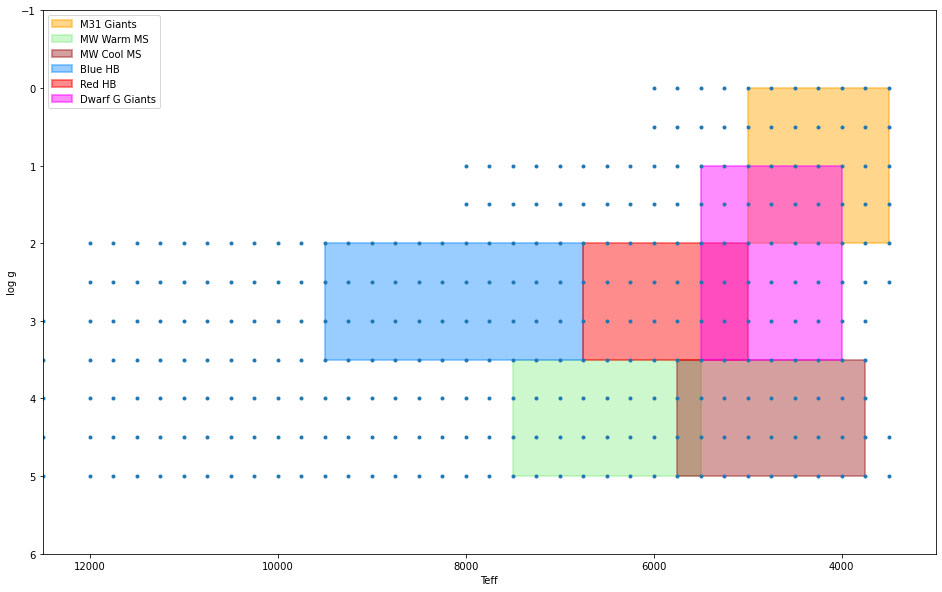

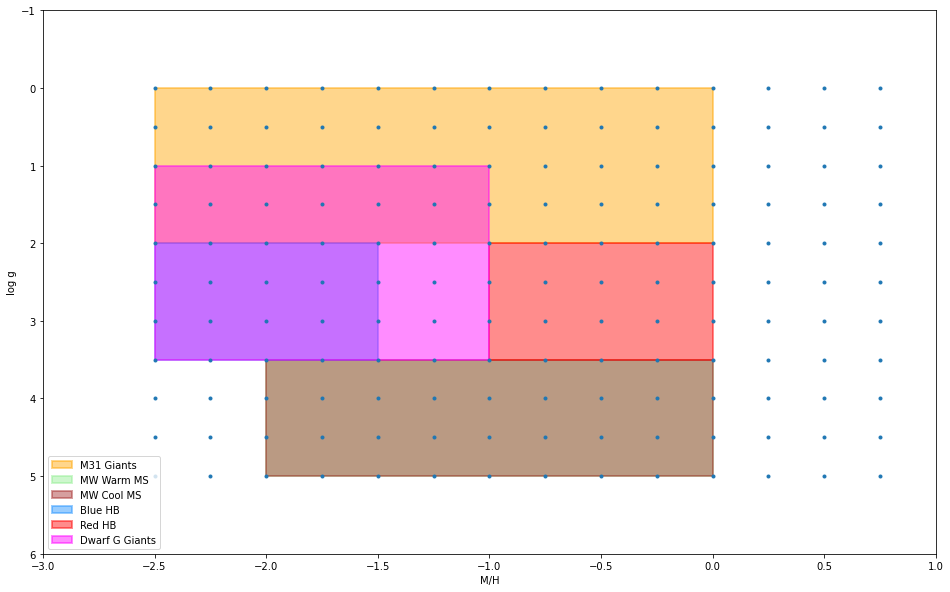

In [6]:
showBlocks2D12(blk,1)
showBlocks2D23(blk,1)

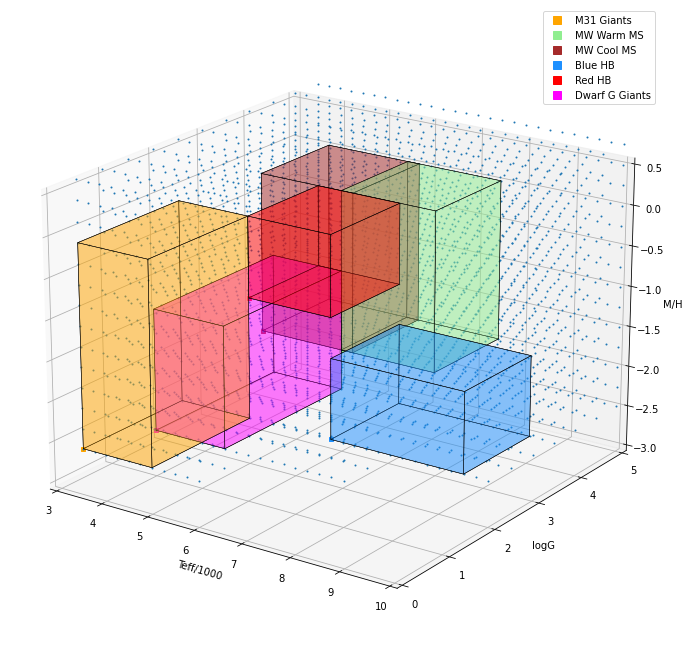

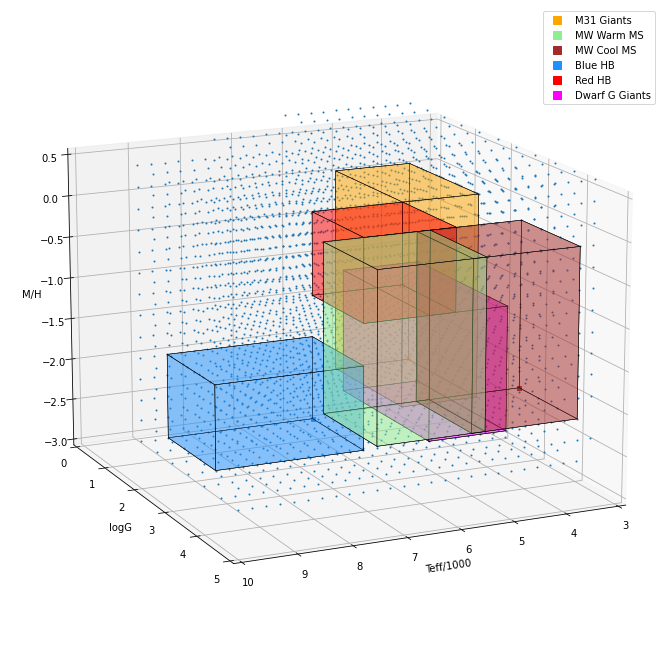

In [136]:
#----------------------------------------
# create a few perspective figures
# will only print if label !=None
#----------------------------------------
showBlocks3D(blk,20,125,'perspective')
showBlocks3D(blk,15,-115,'sideways')

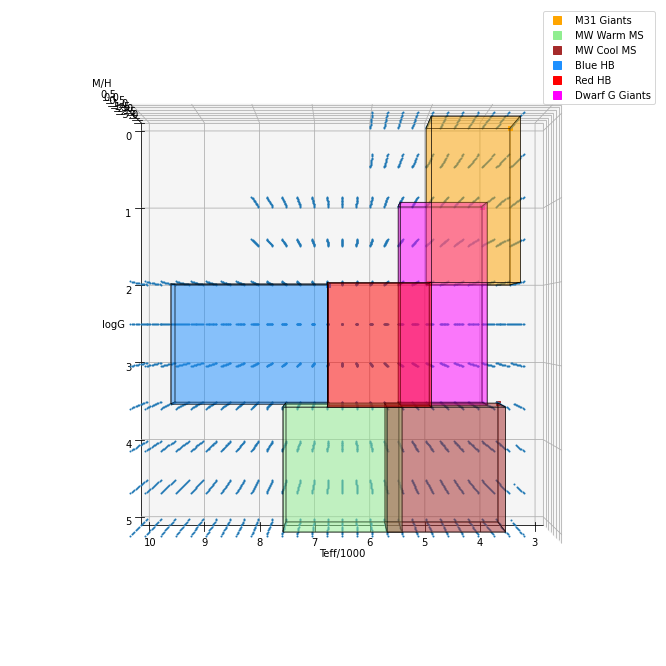

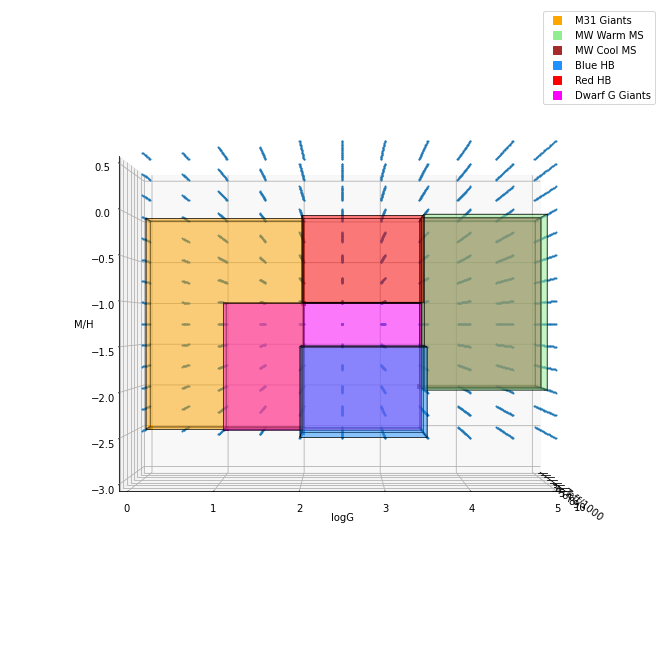

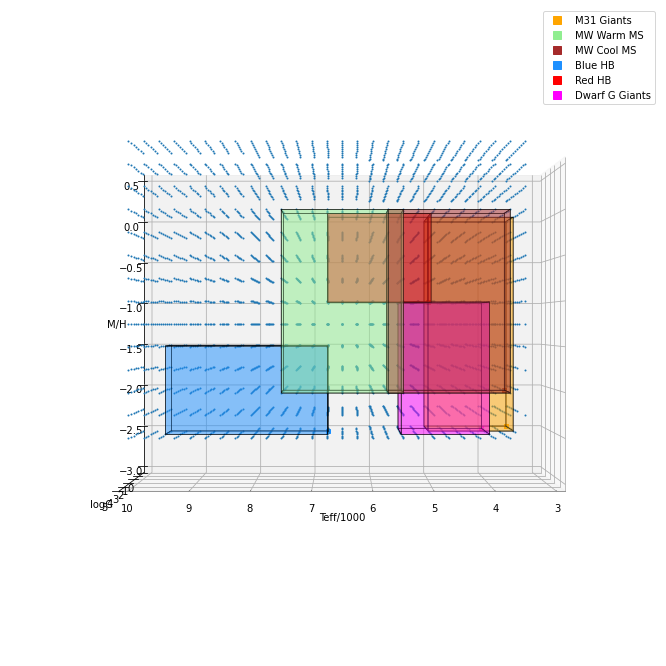

In [128]:
#--------------------------------------
# show the axisparallel projections
#--------------------------------------
showBlocks3D(blk,90,-90,'Teff-logG')
showBlocks3D(blk,0,-180,'logG-M')
showBlocks3D(blk,0,-90,'Teff-M')